In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from pdf2image import convert_from_path # Used to convert pdf to image
import cv2
import numpy as np
from IPython.display import display

In [2]:
def process_and_display_image(pdf_path, target_size=(800, 600),save_path='processed_image.jpeg'):
    
    # Convert PDF to image
    images = convert_from_path(pdf_path)

    # Since there is only 1 image in the pdf
    image = images[0]

    # Automatically rotates the image if needed
    image = ImageOps.exif_transpose(image)

    # Resize image to target size
    image.thumbnail(target_size, Image.Resampling.LANCZOS)

    # Convert to numpy array for any advanced processing
    image_np = np.array(image)

    # Converting to grayscale to reduce variations
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

    # Convert back to PIL image to display in Jupyter
    image_processed = Image.fromarray(image_np)

    # Display the processed image
    display(image_processed)

    # Save the processed image to a file
    image_processed.save(save_path, 'JPEG')
    print(f"Image saved as {save_path}")

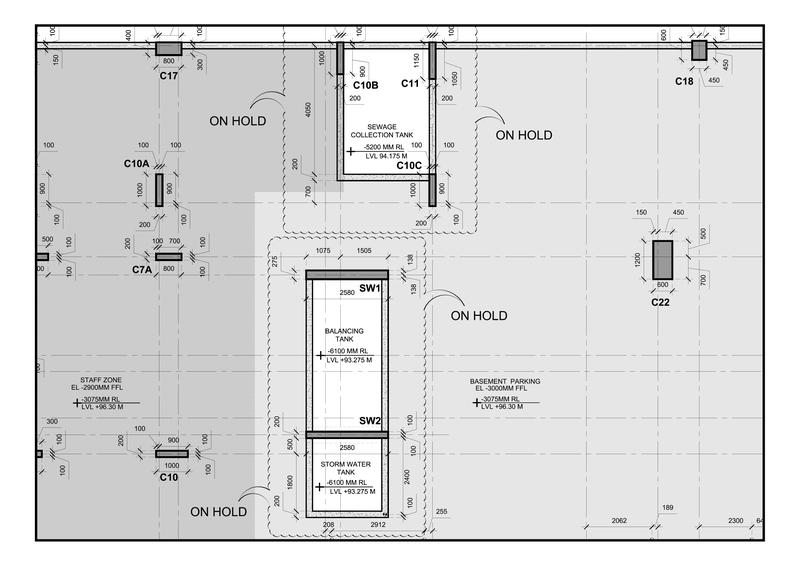

Image saved as file_1.jpeg


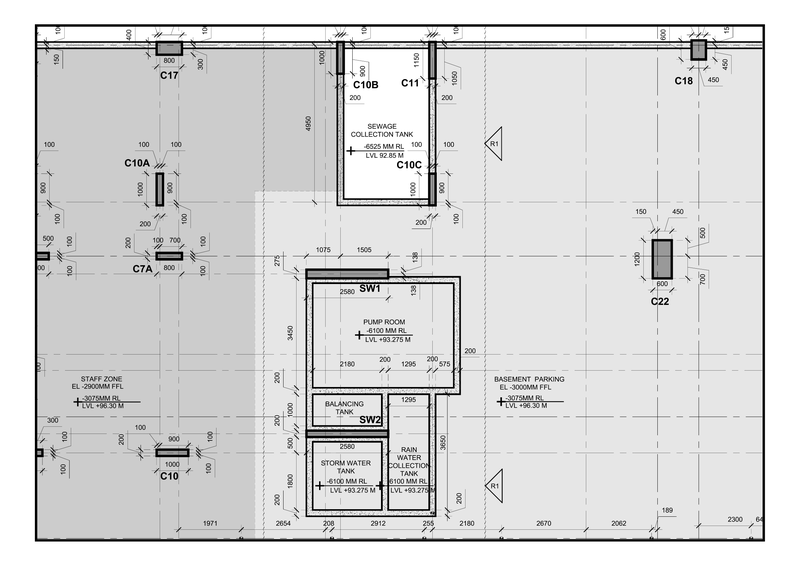

Image saved as file_2.jpeg


In [3]:
process_and_display_image("file_1.pdf",save_path='file_1.jpeg')
process_and_display_image("file_2.pdf",save_path='file_2.jpeg')

In [4]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return imagey
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)


draw_windows = True

In [5]:
def drawWindow(window_name, image):
    if draw_windows:
        
        resize = ResizeWithAspectRatio(image, width= 500)
        
        cv2.imshow(window_name, resize)
        
        cv2.moveWindow(window_name, 600, 200)
        
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [5]:
image1 = cv2.imread('file_1.jpeg', cv2.IMREAD_UNCHANGED)
image1_gray = image1.copy()

In [6]:
ret, mask = cv2.threshold(image1_gray, 0, 255, cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)

image1_copy = image1.copy()

print('mask : ', mask.shape , mask.size, mask.ndim , np.min(mask) , np.max(mask), len(np.unique(mask)))

mask :  (566, 800) 452800 2 0 255 2


In [7]:
image1[mask == 255] = [0, 0, 255]

In [8]:
drawWindow('image1', image1) # Press 0 to close the window

In [9]:
cv2.imwrite('image1_red.png' , image1)

True

In [10]:
print('image1 : ', image1.shape , image1.size, image1.ndim , np.min(image1) 
                  
                          , np.max(image1), len(np.unique(image1)))

image1 :  (566, 800, 3) 1358400 3 0 255 108


In [11]:
image2 = cv2.imread('file_2.jpeg', cv2.IMREAD_UNCHANGED)

image2_gray = image2.copy()

ret, mask = cv2.threshold(image2_gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)

image2_copy = image2.copy()

image2[mask == 255] = [255, 0, 0]


In [12]:
drawWindow('image2', image2)

In [13]:
cv2.imwrite('image2_blue.png' , image2)

True

In [14]:
if image1.shape == image2.shape:
    
    overlay = cv2.addWeighted(image1, 0.5, image2, 0.5, 0) 
       
difference = overlay

print('difference : ', difference.shape , difference.size, difference.ndim ,
      
                  np.min(difference) , np.max(difference), len(np.unique(difference)))

difference :  (566, 800, 3) 1358400 3 0 255 164


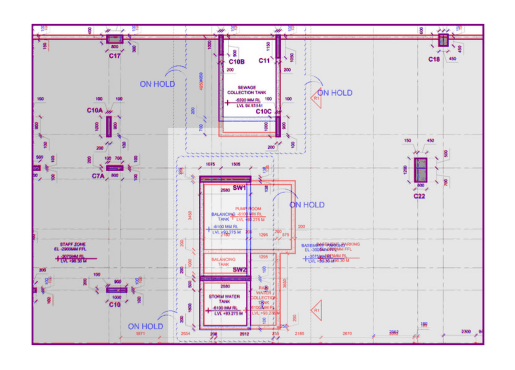

In [15]:
plt.imshow(difference)
plt.axis('off')
plt.show()

In [16]:
drawWindow('difference', difference)

In [17]:
cv2.imwrite('difference.png' , difference)

True

In [18]:
difference2 = np.where((image1_copy == image2_copy) , image1_copy , difference)


print('difference2 : ', difference2.shape , difference2.size, difference2.ndim ,
      
                  np.min(difference2) , np.max(difference2), len(np.unique(difference2)))



difference2 :  (566, 800, 3) 1358400 3 0 255 214


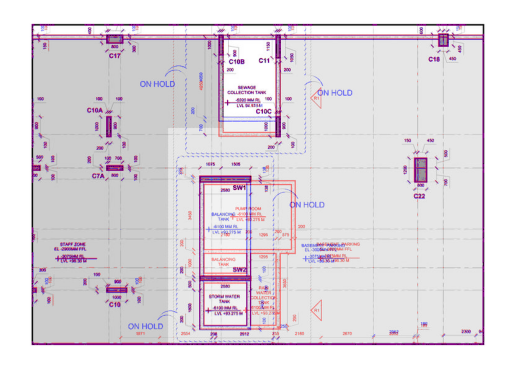

In [19]:
plt.imshow(difference2)
plt.axis('off')
plt.show()

In [20]:
drawWindow('difference2', difference2)

In [21]:
cv2.imwrite('difference2.png' , difference2)

True

In [22]:
diffs = difference2 - difference

print('diffs : ', diffs.shape , diffs.size, diffs.ndim ,
      
                  np.min(diffs) , np.max(diffs), len(np.unique(diffs)))

diffs :  (566, 800, 3) 1358400 3 0 255 150


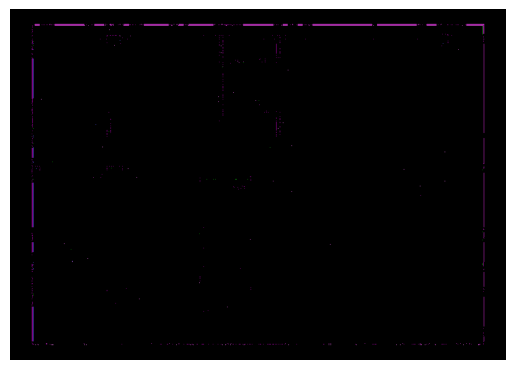

In [23]:
plt.imshow(diffs)
plt.axis('off')
plt.show()

In [24]:
cv2.imwrite('diffs.png' , diffs)

True

In [25]:
drawWindow('diffs', diffs)

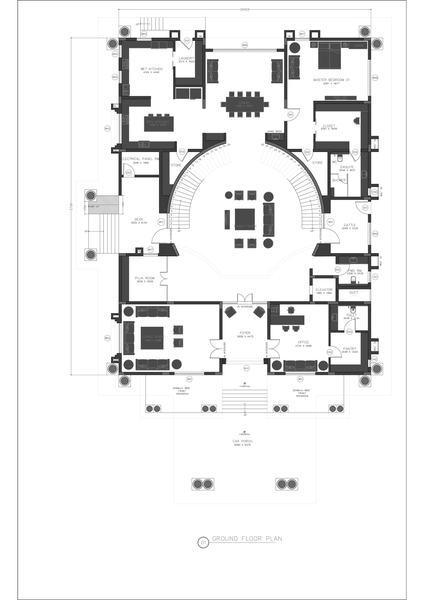

Image saved as trial_3.jpeg


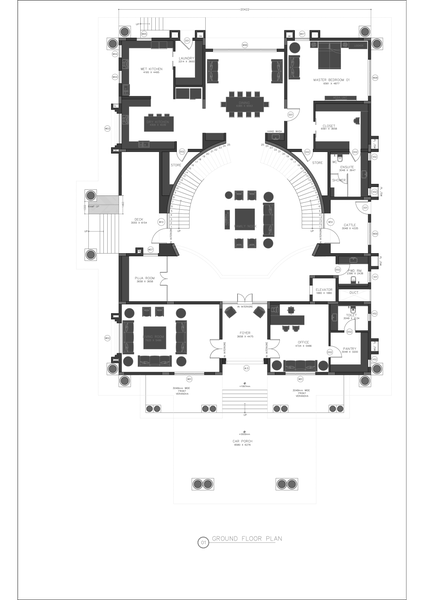

Image saved as trial_4.jpeg


In [6]:
process_and_display_image("trial 3.pdf",save_path='trial_3.jpeg')
process_and_display_image("trial 4.pdf",save_path='trial_4.jpeg')

In [7]:
image3 = cv2.imread('trial_3.jpeg', cv2.IMREAD_UNCHANGED)
image3_gray = image3.copy()

In [8]:
ret, mask = cv2.threshold(image3_gray, 0, 255, cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

image3 = cv2.cvtColor(image3, cv2.COLOR_GRAY2RGB)

image3_copy = image3.copy()

print('mask : ', mask.shape , mask.size, mask.ndim , np.min(mask) , np.max(mask), len(np.unique(mask)))

mask :  (600, 424) 254400 2 0 255 2


In [9]:
image3[mask == 255] = [0, 0, 255]

In [10]:
drawWindow('image3', image3) # Press 0 to close the window

In [12]:
cv2.imwrite('image3_red.png' , image3)

True

In [13]:
print('image3 : ', image3.shape , image3.size, image3.ndim , np.min(image3) 
                  
                          , np.max(image3), len(np.unique(image3)))

image3 :  (600, 424, 3) 763200 3 0 255 91


In [14]:
image4 = cv2.imread('trial_4.jpeg', cv2.IMREAD_UNCHANGED)

image4_gray = image4.copy()

ret, mask = cv2.threshold(image4_gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

image4 = cv2.cvtColor(image4, cv2.COLOR_GRAY2RGB)

image4_copy = image4.copy()

image4[mask == 255] = [255, 0, 0]


In [15]:
drawWindow('image4', image4)

In [16]:
cv2.imwrite('image4_blue.png' , image4)

True

In [17]:
if image3.shape == image4.shape:
    
    overlay = cv2.addWeighted(image3, 0.5, image4, 0.5, 0) 
       
difference = overlay

print('difference : ', difference.shape , difference.size, difference.ndim ,
      
                  np.min(difference) , np.max(difference), len(np.unique(difference)))

difference :  (600, 424, 3) 763200 3 0 255 137


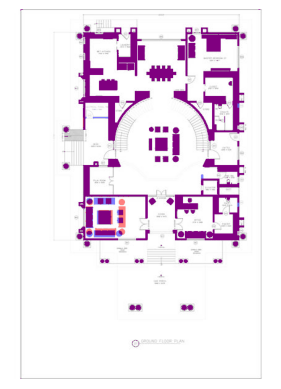

In [18]:
plt.imshow(difference)
plt.axis('off')
plt.show()

In [19]:
drawWindow('difference', difference)

In [20]:
cv2.imwrite('difference_trial.png' , difference)

True

In [21]:
difference2 = np.where((image3_copy == image4_copy) , image3_copy , difference)


print('difference2 : ', difference2.shape , difference2.size, difference2.ndim ,
      
                  np.min(difference2) , np.max(difference2), len(np.unique(difference2)))



difference2 :  (600, 424, 3) 763200 3 0 255 240


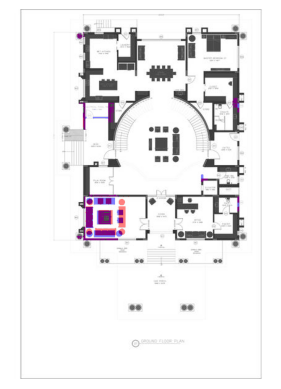

In [22]:
plt.imshow(difference2)
plt.axis('off')
plt.show()

In [23]:
drawWindow('difference2', difference2)

In [24]:
cv2.imwrite('difference2_trial.png' , difference2)

True

In [25]:
diffs = difference2 - difference

print('diffs : ', diffs.shape , diffs.size, diffs.ndim ,
      
                  np.min(diffs) , np.max(diffs), len(np.unique(diffs)))

diffs :  (600, 424, 3) 763200 3 0 255 256


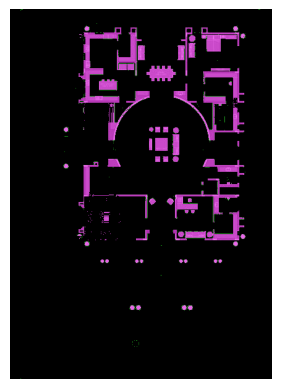

In [26]:
plt.imshow(diffs)
plt.axis('off')
plt.show()